In [1]:
import pandas as pd
from sklearn.cluster import KMeans
from yellowbrick.text import TSNEVisualizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from binning import BalancedBinningReference
from yellowbrick.classifier import ClassBalance, ClassPredictionError
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import ExtraTreesClassifier, RandomForestClassifier
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.metrics import accuracy_score, f1_score
%matplotlib inline

In [19]:
data = pd.read_csv('../../blog-posts/calzone/processed_datascience.csv.bz2')
#data = data.sample(856)
data['log_ups'] = np.log1p(data['ups'])

The binning reference values are: [0.6931471805599453, 1.0986122886681098, 1.6094379124341003, 2.0794415416798357, 2.70805020110221]


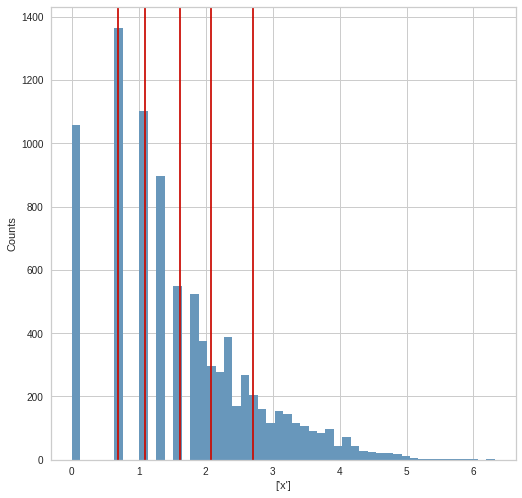

In [28]:
viz = BalancedBinningReference(bins=6)
viz.fit(data.log_ups)
viz.poof()

In [21]:
data['bin_ups'] = np.digitize(data.log_ups,[0.6931471805599453, 1.0986122886681098, 1.3862943611198906, 1.9459101490553132, 2.772588722239781])

train_X, test_X, train_y, test_y = train_test_split(data.title, 
                                                    data.bin_ups, 
                                                    test_size=0.20,
                                                    random_state=25)

In [22]:
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('clf', RandomForestClassifier()),
])

pipeline.fit(train_X, train_y)
y_pred = pipeline.predict(test_X)

Accuracy: 20.5%


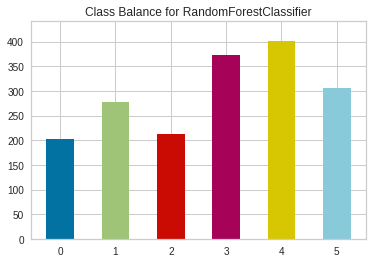

In [23]:
# Measure prediction Accuracy and F1 Score
accuracy = accuracy_score(y_pred=y_pred, y_true=test_y)
print('Accuracy: {:03.1f}%'.format(accuracy * 100))

viz1 = ClassBalance(pipeline)
viz1.score(test_X, test_y)
viz1.poof()

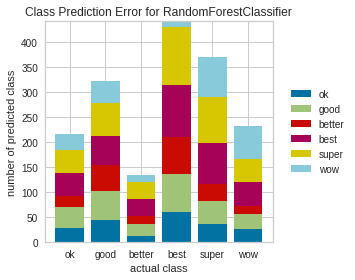

In [26]:
viz1 = ClassPredictionError(pipeline, classes=['ok','good', 'better', 'best', 'super','wow'])
viz1.score(test_X, test_y)
viz1.poof()

<BarContainer object of 6 artists>

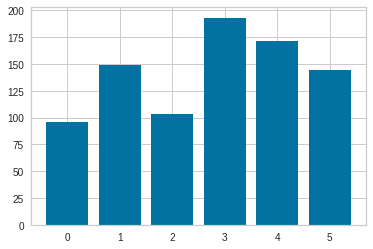

In [11]:
bins = np.array([1, 2, 3, 6, 14])
inds = np.digitize(data.ups, bins)
bincounts = np.bincount(inds)
plt.bar(np.arange(6), bincounts)